# Power of Feature Engineering
Compare the performance of logistic regression to a DNN Classifier on a non-linear dataset. This is to show that similar accuracy, to the DNN, can be acheived by using logistic regression with transformations of the data. 

## Prepare Data

654


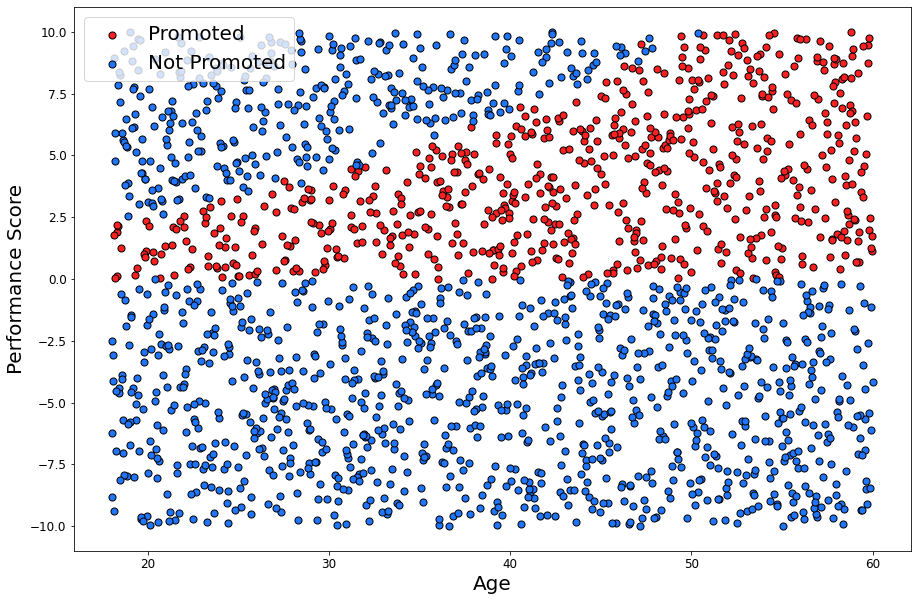

In [82]:
import numpy as np
import pandas as pd

n_points = 2000

age = np.round(np.linspace(18,60,n_points),2) #age of employee
np.random.shuffle(age) 

performance = np.linspace(-10,10,n_points) #performance score of employee
np.random.shuffle(performance) 

noise = np.random.randn(n_points) 

g = (100*age) +2*(performance) + 1000*age/performance -10000 + 200*noise
y = [1 if y>=0 else 0 for y in g] 

data = pd.DataFrame(data={'age':age,'performance':performance,'y':y})

print(sum(y))
data.head()


import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(nrows=1, ncols=1,figsize=(15,10))

plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.legend(['Promoted','Not Promoted'],loc =2,prop={"size":20})

plt.savefig('/Users/conorosully/Documents/git/deep-learning/figures/article_feature_eng/figure1.png',format='png')

In [31]:
#data.to_csv('/Users/conorosully/Documents/git/deep-learning/data/performance.csv')
data = pd.read_csv('/Users/conorosully/Documents/git/deep-learning/data/performance.csv')
sum(data['y'])

494

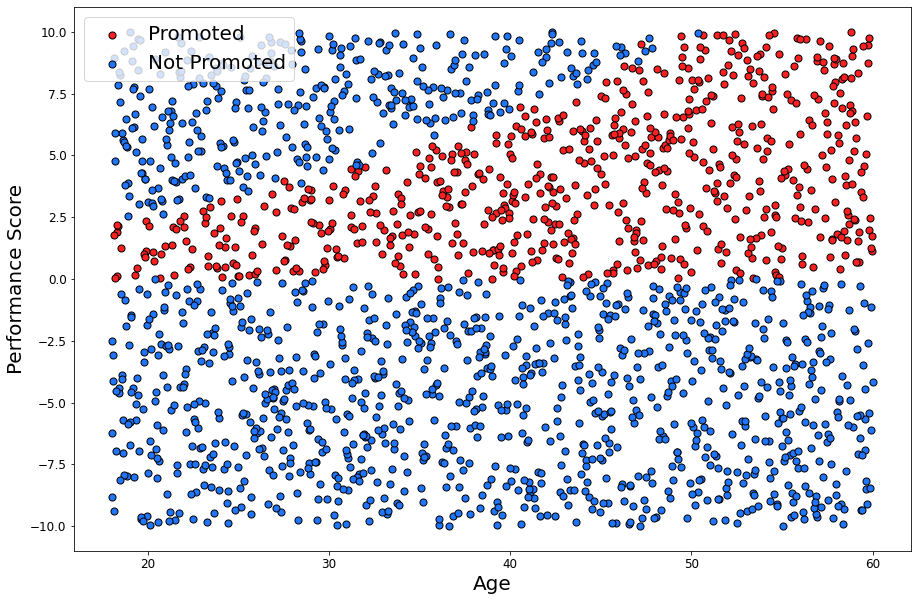

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(nrows=1, ncols=1,figsize=(15,10))

plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.legend(['Promoted','Not Promoted'],loc =2,prop={"size":20})

plt.savefig('/Users/conorosully/Documents/git/deep-learning/figures/article_feature_eng/figure1.png',format='png')

## Logistic Regression

In [84]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metric
import statsmodels.api as sm

x = data[['age','performance']]
x = sm.add_constant(x)
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)

model = sm.Logit(y_train,x_train).fit() #fit logistic regression model

predictions = np.around(model.predict(x_test)) 
accuracy = metric.accuracy_score(y_test,predictions)

print(round(accuracy*100,2))

Optimization terminated successfully.
         Current function value: 0.472112
         Iterations 6
80.0


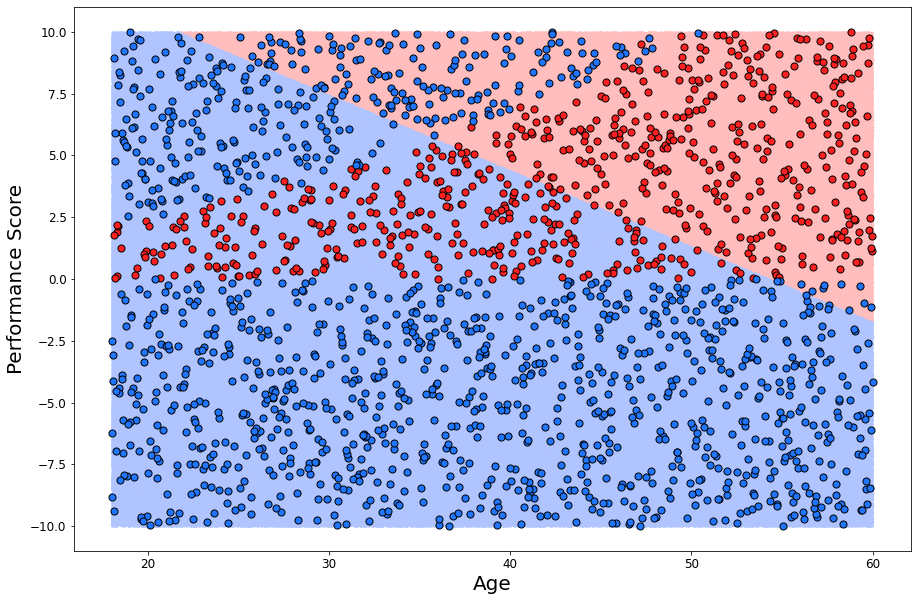

In [85]:
n_points = 1000000 #use many point to visualise decision boundry

age_db = np.linspace(18,60,n_points)
np.random.shuffle(age_db)

performance_db= np.linspace(-10,10,n_points)
np.random.shuffle(performance_db)

data_db = pd.DataFrame({'age':age_db,'performance':performance_db})
data_db = sm.add_constant(data_db)

#make predictions on the decision boundry points
predictions = model.predict(data_db)
y_db = [round(p) for p in predictions] 
data_db['y'] = y_db

fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.savefig('/Users/conorosully/Documents/git/deep-learning/figures/article_feature_eng/figure2.png',format='png')

### Add transformations and interactions

In [86]:
x = data[['age','performance','age_perf_ratio']]
x = sm.add_constant(x)
x

KeyError: "['age_perf_ratio'] not in index"

/Users/conorosully/virtualenv/tensor/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.010096
         Iterations 21
0.9916666666666667


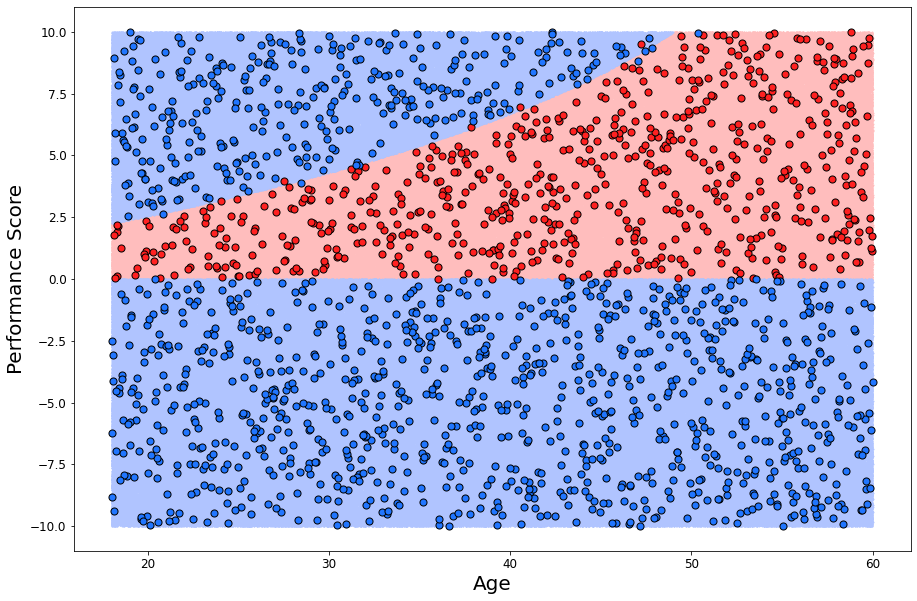

In [87]:
data['age_sqrd'] = age**2
data['age_perf_ratio'] = age/performance

x = data[['age','performance','age_perf_ratio']]
x = sm.add_constant(x)
y = data['y']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 99)

model = sm.Logit(y_train,x_train).fit() #fit new logistic regression model

predictions = np.around(model.predict(x_test))
print(metric.accuracy_score(y_test,predictions))



#Update decision boundry points
data_db.drop('y',axis=1,inplace=True)
#data_db['age_sqrd'] = data_db['age']**2
data_db['age_perf_ratio'] = data_db['age']/data_db['performance']

#make predictions on the decision boundry points
predictions = model.predict(data_db)
y_db = [round(p) for p in predictions] 
data_db['y'] = y_db

fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.savefig('/Users/conorosully/Documents/git/deep-learning/figures/article_feature_eng/figureFinal.png',format='png')


In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1400
Model:                          Logit   Df Residuals:                     1396
Method:                           MLE   Df Model:                            3
Date:                Sun, 19 Apr 2020   Pseudo R-squ.:                  0.9839
Time:                        17:22:20   Log-Likelihood:                -14.134
converged:                       True   LL-Null:                       -876.10
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -108.9601     27.995     -3.892      0.000    -163.828     -54.092
age                0.6719      0.415      1.618      0.106      -0.142       1.486
performance        1.9395      2.004      0.968      0.333      -1.988       5.867
age_perf_ratio    11.5618      3.190      3.625      0.000       5.310      17.814
==================================================================================

Possibly complete quasi-separation: A fraction 0.94 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

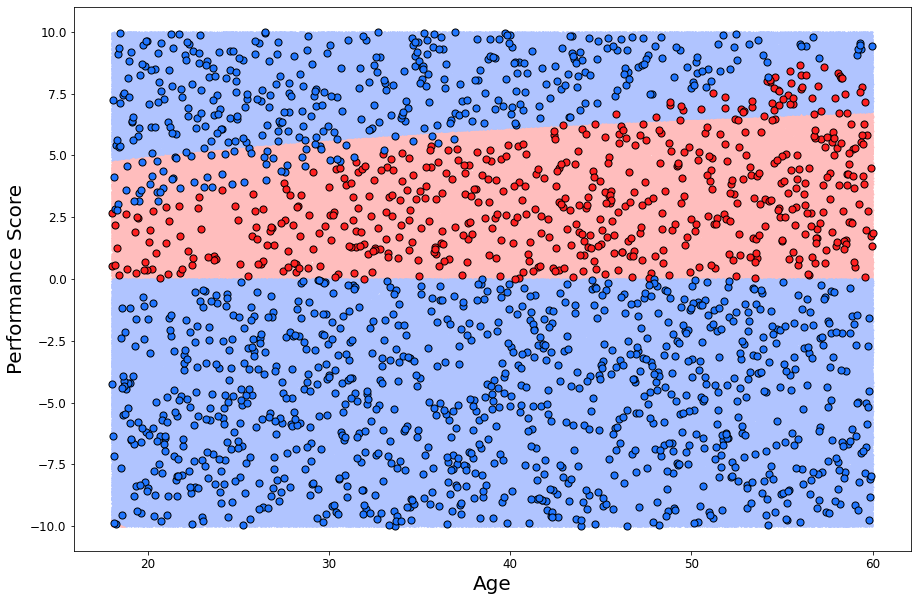

## DNN Classifier


In [40]:
from keras.models import Sequential
from keras.layers import Dense

x = data[['age','performance']]
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)

model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size=10) #fit ANN

accuracy = model.evaluate(x_test, y_test)
print(round(accuracy[1]*100,2))

Using TensorFlow backend.


Epoch 1/100
1400/1400 [==============================] - 0s 234us/step - loss: 0.6592 - accuracy: 0.5886
Epoch 2/100
1400/1400 [==============================] - 0s 114us/step - loss: 0.5732 - accuracy: 0.5879
Epoch 3/100
1400/1400 [==============================] - 0s 102us/step - loss: 0.4657 - accuracy: 0.6793
Epoch 4/100
1400/1400 [==============================] - 0s 114us/step - loss: 0.4000 - accuracy: 0.7950
Epoch 5/100
1400/1400 [==============================] - 0s 115us/step - loss: 0.3349 - accuracy: 0.8743
Epoch 6/100
1400/1400 [==============================] - 0s 96us/step - loss: 0.2483 - accuracy: 0.9379
Epoch 7/100
1400/1400 [==============================] - 0s 97us/step - loss: 0.2065 - accuracy: 0.9514
Epoch 8/100
1400/1400 [==============================] - 0s 92us/step - loss: 0.1703 - accuracy: 0.9650
Epoch 9/100
1400/1400 [==============================] - 0s 98us/step - loss: 0.1520 - accuracy: 0.9650
Epoch 10/100
1400/1400 [==============================] - 0

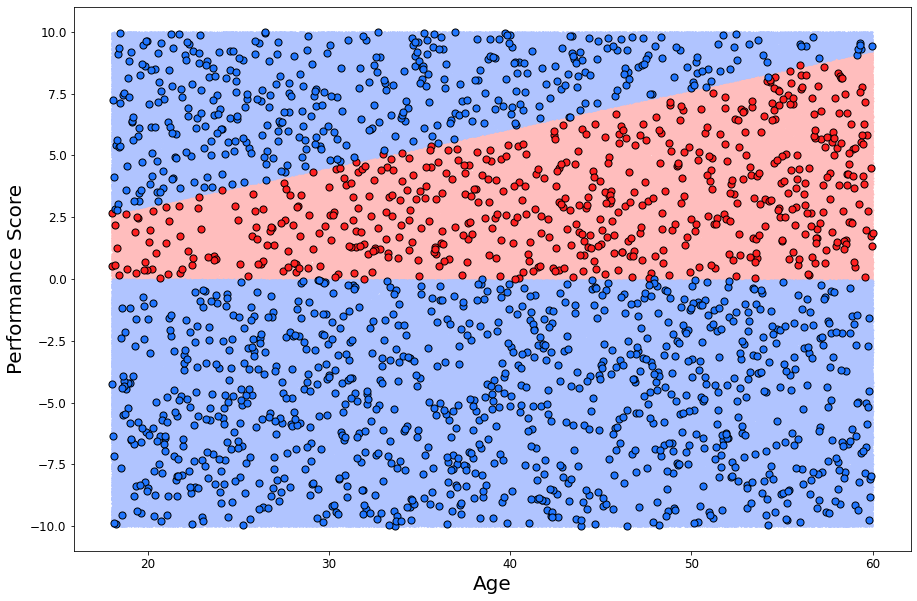

In [41]:
#make predictions on the decision boundry points
predictions = model.predict(data_db[['age','performance']])
y_db = np.around(predictions )
data_db['y'] = y_db

fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

plt.savefig('/Users/conorosully/Documents/git/deep-learning/figures/article_feature_eng/figure_ann.png',format='png')